In [52]:
import pandas as pd

In [71]:
df = pd.read_excel("/Users/alicjawojciechowska/Documents/GitHub/ECHA_2025_phase2/PHASE2_inventory_v4032025.xlsx")

In [72]:
df["NAM name"] = df["NAM name"].astype(str).apply(lambda x: x.capitalize())

In [73]:
df["NAM name"] = df["NAM name"].astype(str).apply(lambda x: x.replace('_', ' ').capitalize())

In [74]:
df["Intended purpose"] = df["Intended purpose"].astype(str).apply(lambda x: x.capitalize())

In [67]:
df["Overlap with Phase 1 inventory (yes/no)"] = df["Overlap with Phase 1 inventory (yes/no)"].astype(str).apply(lambda x: x.lower())

In [76]:
df["Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)"] = df["Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)"].astype(str).apply(lambda x: x.capitalize())

In [77]:
df

,NAMs ID,NAM name,Intended purpose,Overlap with Phase 1 inventory (yes/no),Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT),Regulator document reference <lista subsections/Annex z REACH>,Funder,Initiative,Initiative IDs / grant no,Leading institution,Organ/system,"NAMs stage (time period, extpected outcome etc.)","Type (phys-chem characterization, in chemico, in vitro, in silico, ex vivo, in vivo)","Document type (guidance, guideline, ITS, IATA, defined approaches, ISO standards, deliverable, SOP, publication etc.)",Guideline/ strategy,Guideline/ strategy/ source_ref,Nanomaterials used,"test items included conventional chemicals, drugs, vaccines etc.",Unnamed: 18
0,1,Particle size and size distribution of manufac...,Evaluation of the nanopraticle size and size d...,no,Particle size distrubution,REACH: Annex VI subsections 2.3 and 2.4,OECD/H2020-EU.2.1.3. - INDUSTRIAL LEADERSHIP -...,NANOMET project/RiskGONE,887268/814425,OECD/STIFTELSEN NILU,-,validated,physicochemical characterization,test guideline,Test No. 125: Nanomaterial Particle Size and S...,https://www.oecd.org/en/publications/test-no-1...,"[p:68, Table 6] particles: Ag, SiO2 [20nm], Si...",-,NaN
1,2,Determination of solubility and dissolution ra...,Physicochemical characterization,no,"Water solubility, dissolution rate in relevant...",REACH: Annex VI subsections 2.3 and 2.4,OECD/H2020,NANOMET project/NanoHarmony/Gov4Nano/PATROLS/G...,887268/885931/814401/760813/760840,OECD,-,expected 2025,physicochemical characterization,-,-,-,not specified,-,NaN
2,3,Identification and quantification of the surfa...,Physicochemical characterization,no,Surface chemistry,REACH: Annex VI subsections 2.3 and 2.4,OECD/H2020,NanoHarmony,885931,NRCWE/BfR,-,expected 2025,physicochemical characterization,-,-,-,not specified,-,NaN
3,4,Determination of the dustiness of manufactured...,Physicochemical characterization,no,Dustiness,NaN,OECD,OECD Working Party of Manufactured Nanomaterials,-,-,-,expected 2025,physicochemical characterization,test guideline,Test Guideline on the dustiness determination ...,Draft: https://www.oecd.org/content/dam/oecd/e...,not specified,-,NaN
4,5,Determination of the (volume) specific surface...,Physicochemical characterization,no,Surface area,NaN,OECD/ H2020-EU.2.1.3. - INDUSTRIAL LEADERSHIP ...,NANOMET project/RiskGone/Gov4Nano,887268/814425/814401,OECD/ RIJKSINSTITUUT VOOR VOLKSGEZONDHEID EN M...,-,validated,physicochemical characterization,test guideline,Test No. 124: Determination of the Volume Spec...,https://www.oecd.org/en/publications/test-no-1...,"TiO2, SiO2, ZnO",-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,156,Cytotoxicity rtgill-w1 cell line assay,The test is designed to (i) predict fish acute...,"Yes, but not as OECD TG 249 procedure",Rtgill-w1 cell,OECD TG 249 / 9.1.3. Short-term toxicity test...,OECD,NaN,NaN,OECD,permanent cell line from rainbow trout (Oncorh...,NaN,in vitro,guidance document,OECD TG 249:\nFish Cell Line Acute Toxicity: T...,https://www.oecd.org/en/publications/test-no-2...,no,chemicals,NaN
152,157,easzy assay,Detect endocrine active chemicals acting as ag...,NO,Estrogen receptors (ers),OECD TG 250 / 9.1.3. Short-term toxicity test...,OECD,NaN,NaN,OECD,transgenic tg(cyp19a1b:GFP) Zebrafish embryos,NaN,in vivo,guidance document,OECD TG 250: EASZY assay: Detection of Endocri...,https://www.oecd.org/en/publications/test-no-2...,no,chemicals,NaN
153,158,Rapid androgen disruption activity reporter (r...,to detect chemicals active on the androgen axis.,NO,Endocrine disruption,OECD TG 251 / 9.1.3. Short-term toxicity test...,OECD,NaN,NaN,OECD,transgenic Japanese medaka line harbouring the...,NaN,in vivo,guidance document,OECD TG 251: Rapid Androgen Disruption Activi...,https://www.oecd.org/en/publications/test-no-2...,no,chemicals,NaN
154,159,Rapid estrogen activity in vivo (reactiv) assay,To measure the response of eleutheroembryos to...,NO,Endocrine disruption,OE

In [78]:
df.to_excel("new_inventoryPHASE2.xlsx")

In [59]:
value_counts = df["Overlap with Phase 1 inventory (yes/no)"].value_counts().to_dict()
value_counts

{'no': 144, 'yes': 11, 'yes, but not as oecd tg 249 procedure': 1}

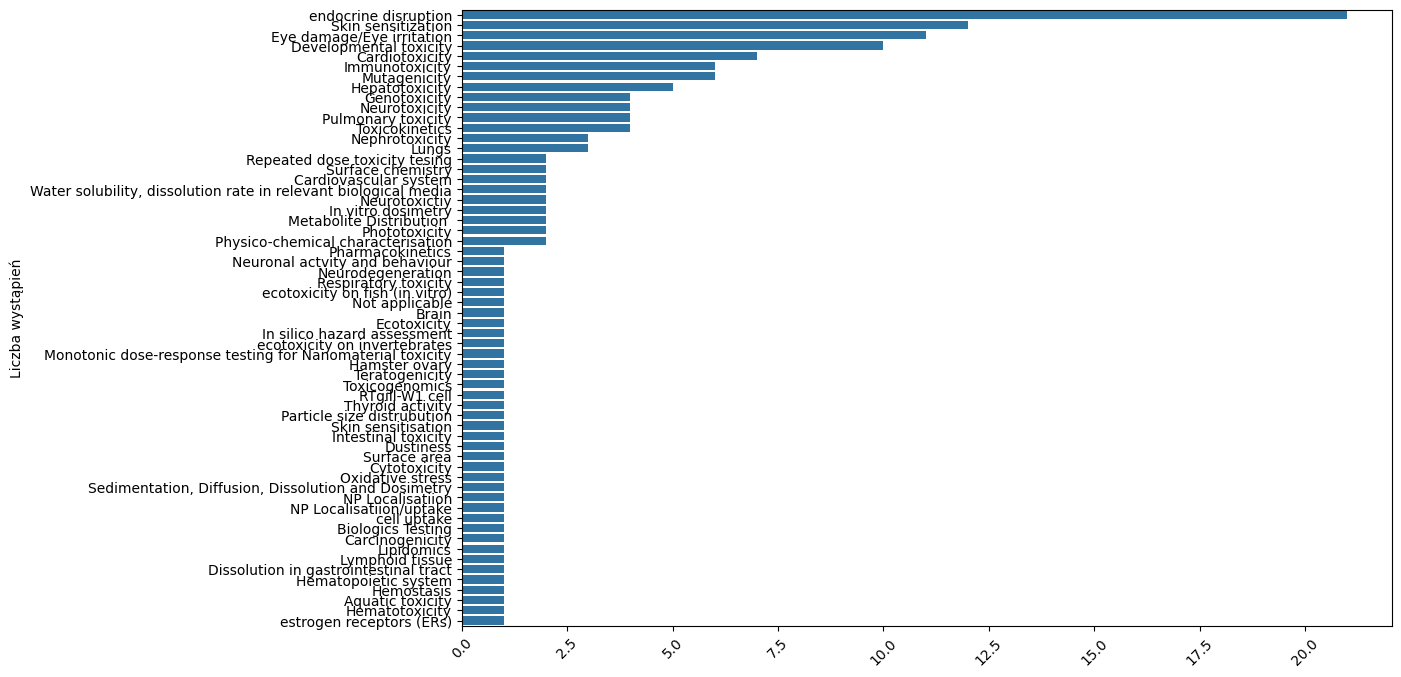

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


split_values = df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)'].str.split('\n').explode()

# Zliczamy wystąpienia każdego zwierzęcia
counts = split_values.value_counts()

# Tworzymy wykres słupkowy
plt.figure(figsize=(12, 8))
sns.barplot(y=counts.index, x=counts.values)
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
# Wyświetlamy wykres
plt.show()

In [61]:
counts

Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)
endocrine disruption                                               21
Skin sensitization                                                 12
Eye damage/Eye irritation                                          11
Developmental toxicity                                             10
Cardiotoxicity                                                      7
Immunotoxicity                                                      6
Mutagenicity                                                        6
Hepatotoxicity                                                      5
Genotoxicity                                                        4
Neurotoxicity                                                       4
Pulmonary toxicity                                                  4
Toxicokinetics                                                      4
Nephrotoxicity                                                      3
Lungs    

In [62]:
df['Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT)']

0                             Particle size distrubution
1      Water solubility, dissolution rate in relevant...
2                                      Surface chemistry
3                                              Dustiness
4                                           Surface area
                             ...                        
151                                       RTgill-W1 cell
152                             estrogen receptors (ERs)
153                                 endocrine disruption
154                                 endocrine disruption
155                                 endocrine disruption
Name: Standard Information Requirements (SIRs) / Specific Target Organ Toxicity (STOT), Length: 156, dtype: object